<a href="https://colab.research.google.com/github/SYkkk55/Kaggle-Project/blob/main/Titanic%20-%20Machine%20Learning%20from%20Disaster/Titanic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle 鐵達尼

# Kaggle 上繳交的程式範例
## https://www.kaggle.com/sykkkk/notebook-titanic/edit
## https://www.kaggle.com/alexisbcook/titanic-tutorial


# 參考
## https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC4-1%E8%AC%9B-kaggle%E7%AB%B6%E8%B3%BD-%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E7%94%9F%E5%AD%98%E9%A0%90%E6%B8%AC-%E5%89%8D16-%E6%8E%92%E5%90%8D-a8842fea7077

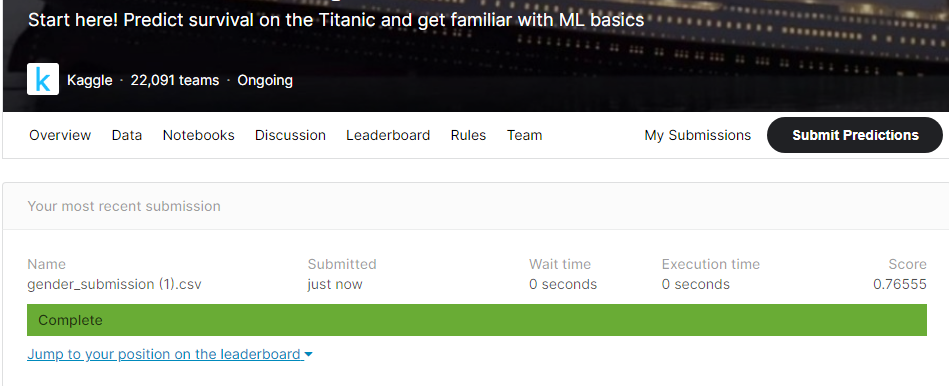

In [ ]:
# # kaggle 上的語法

# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
# train_data.head()

# test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
# test_data.head()

# women = train_data.loc[train_data.Sex == 'female']["Survived"]
# rate_women = sum(women)/len(women)

# print("% of women who survived:", rate_women)

# men = train_data.loc[train_data.Sex == 'male']["Survived"]
# rate_men = sum(men)/len(men)

# print("% of men who survived:", rate_men)

# from sklearn.ensemble import RandomForestClassifier

# y = train_data["Survived"]

# features = ["Pclass", "Sex", "SibSp", "Parch"]
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('my_submission.csv', index=False)
# print("Your submission was successfully saved!")

# Colab 開始
## 記得先把訓練測試檔案放上去



In [ ]:
ls

gender_submission.csv  sample_data/  test.csv  train.csv


In [ ]:
import numpy
import pandas as pd

# input train data
train_data = pd.read_csv("train.csv")
train_data.head()

# train data 分析
# 資料欄位

# PassengerId 座位編號1-891
# Survived 存活 1 或 0 (1是存活)
# Pclass 艙等有三種 分別為 1、2、3 =>分別是頭等艙、二等艙、三等艙
# sex 性別
# Age 年齡
# sibsp  堂兄弟姊妹 個數
# Parch 父母與小孩個數
# Ticket 船票資訊
# Fare 票價
# Cabin 艙號
# embarked 登船港口 有三個 (C = Cherbourg, Q = Queenstown, S = Southampton)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# input test data
test_data = pd.read_csv("test.csv")
test_data.head()

# test data 同訓練資料=>輸入那些資訊預測存活或滅亡 1 or 0
# 測試資料的 PassengerId	從 892 到 1390

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
submit=pd.read_csv("gender_submission.csv")

# 清理資料
## 處理 train data
## 1. 把 label 先分開
## 2. 刪除 label
## 3. 觀察 PassengerId	好像沒有特殊意義先刪除它
## 4. 畫出各欄位和 生存的比率

In [ ]:
# 3. 刪除 passengerID
print(train_data)
train_data=train_data.drop(['PassengerId'],axis=1)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


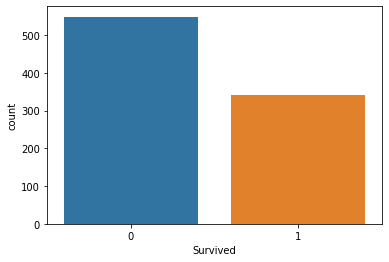

In [ ]:
# 計算存活率
import seaborn as sns
sns.countplot(train_data['Survived'])

# 500多人死亡、300多人存活

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


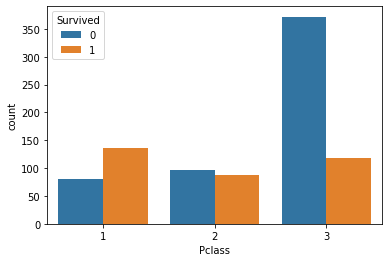

In [ ]:
sns.countplot(train_data['Pclass'],hue=train_data['Survived'])
# 第三艙等死亡比較多

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


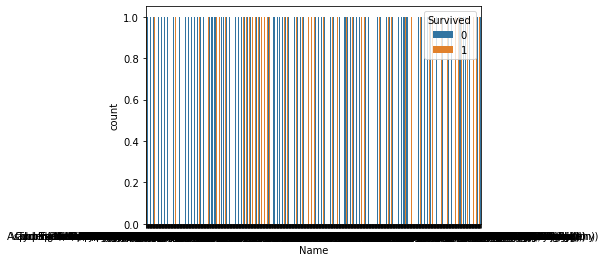

In [ ]:
sns.countplot(train_data['Name'],hue=train_data['Survived'])


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


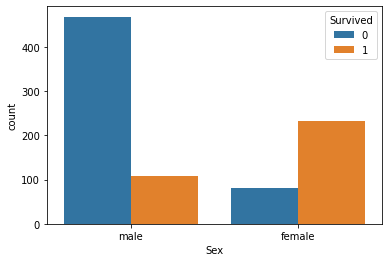

In [ ]:
sns.countplot(train_data['Sex'],hue=train_data['Survived'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


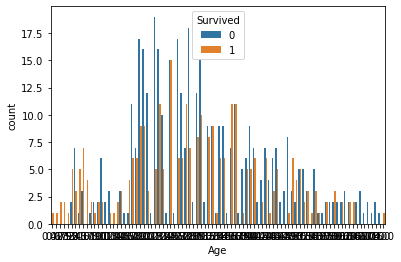

In [ ]:
sns.countplot(train_data['Age'],hue=train_data['Survived'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


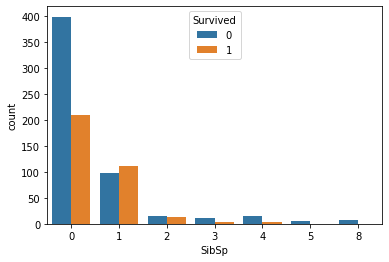

In [ ]:
sns.countplot(train_data['SibSp'],hue=train_data['Survived'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


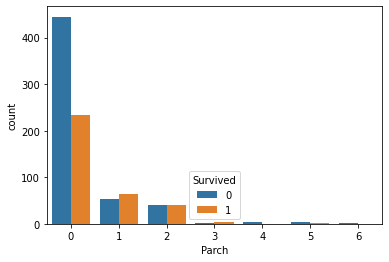

In [ ]:
sns.countplot(train_data['Parch'],hue=train_data['Survived'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


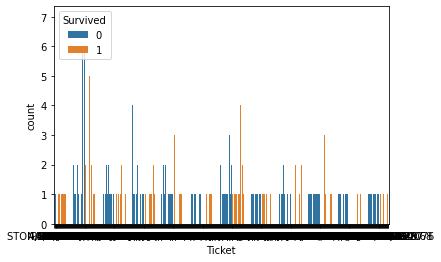

In [ ]:
sns.countplot(train_data['Ticket'],hue=train_data['Survived'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


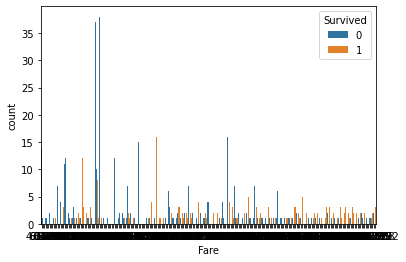

In [ ]:
sns.countplot(train_data['Fare'],hue=train_data['Survived'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


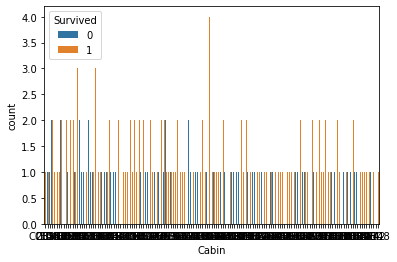

In [ ]:
sns.countplot(train_data['Cabin'],hue=train_data['Survived'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


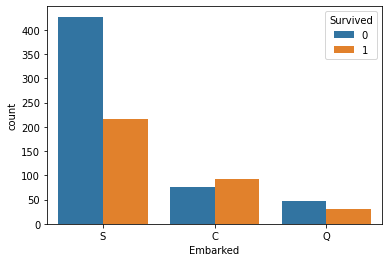

In [ ]:
sns.countplot(train_data['Embarked'],hue=train_data['Survived'])

## 處理 Name 這個欄位

In [ ]:
train_data['Name']
#好像都有 Miss Mr ，都用 逗號分開

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:

# 多弄一個欄位讓他們分開 

train_data['title']=train_data['Name'].str.split(',',expand=True)[1]
train_data['title']

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
886                                    Rev. Juozas
887                           Miss. Margaret Edith
888                 Miss. Catherine Helen "Carrie"
889                                Mr. Karl Howell
890                                    Mr. Patrick
Name: title, Length: 891, dtype: object

In [ ]:
# 名字的前半段放在 Name 
# 逗號後半部的點前面 放在 title(mr miss 那些分開)
train_data['Name']=train_data['Name'].str.split(',',expand=True)[0]
train_data['Name']

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [ ]:

train_data['title']
# 把 mr 和 miss 分出來
train_data['title']=train_data['title'].str.split('.',expand=True)[0]
print(train_data['title'].unique())
print(len(train_data['title'].unique()))

# 總共有17種

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']
17


In [ ]:
# 再來要想怎麼運用姓名這幾個特徵
# 把姓名和性別一起處理

pd.crosstab(train_data['title'],train_data['Sex']).T.style.background_gradient(cmap='summer_r')

title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


In [ ]:

pd.crosstab(train_data['title'],train_data['Survived']).T.style.background_gradient(cmap='summer_r')

# 可以看到有一些 title 幾乎都死亡

title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [ ]:
train=train_data
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,0,3,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,Futrelle,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,Allen,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
# 看 title 在年齡的分布平均

train_data.groupby(['title'])['Age'].mean()

# 例如 "Capt" title 平均年齡70歲
# Master       平均年齡 快5歲

title
 Capt            70.000000
 Col             58.000000
 Don             40.000000
 Dr              42.000000
 Jonkheer        38.000000
 Lady            48.000000
 Major           48.500000
 Master           4.574167
 Miss            21.773973
 Mlle            24.000000
 Mme             24.000000
 Mr              32.368090
 Mrs             35.898148
 Ms              28.000000
 Rev             43.166667
 Sir             49.000000
 the Countess    33.000000
Name: Age, dtype: float64

In [ ]:
pd.crosstab(train_data['title'], train_data['Sex'])
# 從這裡可以看出 title 這個變項，其實只有在 miss、Mr、Mrs 比較多，
# (補充有一個 Master 有40 但還是偏少，先不處理) 假設先處理 Master 變成一個欄位那剩下的 rare 會非常的少
# 因此把這個 title 歸類成四個分類 miss、Mr、Mrs 和 rare


Sex,female,male
title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [ ]:
train_data['title2'] = (train_data['title']).replace(("Capt","Col","Don","Dr","Jonkheer","Major","Master","Rev","Sir"),"Rare",regex=True)
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,title2
0,0,3,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,1,1,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,1,3,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,1,1,Futrelle,female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,0,3,Allen,male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr
5,0,3,Moran,male,NaN,0,0,330877,8.4583,NaN,Q,Mr,Mr
6,0,1,McCarthy,male,54.0,0,0,17463,51.8625,E46,S,Mr,Mr
7,0,3,Palsson,male,2.0,3,1,349909,21.0750,NaN,S,Master,Rare
8,1,3,Johnson,female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Mrs
9,1,2,Nasser,female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Mrs


In [ ]:

train_data['title2'] = (train_data['title']).replace(("Capt","Col","Don","Dr","Jonkheer","Major","Master","Rev","Sir","Mme","Lady","the Countess"),"Rare",regex=True)
train_data['title2'] = (train_data['title2']).replace(('Mlle','Ms','Mrs'),'Miss',regex=True)
train_data['title2'] = (train_data['title2']).replace(('Mlle','Ms'),'Miss',regex=True)
train_data.head(10)
# Lady
# Mlle
# Mme

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,title2
0,0,3,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,1,1,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Miss
2,1,3,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,1,1,Futrelle,female,35.0,1,0,113803,53.1000,C123,S,Mrs,Miss
4,0,3,Allen,male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr
5,0,3,Moran,male,NaN,0,0,330877,8.4583,NaN,Q,Mr,Mr
6,0,1,McCarthy,male,54.0,0,0,17463,51.8625,E46,S,Mr,Mr
7,0,3,Palsson,male,2.0,3,1,349909,21.0750,NaN,S,Master,Rare
8,1,3,Johnson,female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Miss
9,1,2,Nasser,female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Miss


In [ ]:
train_data['title2'].unique()

array([' Mr', ' Miss', ' Rare'], dtype=object)

In [ ]:
pd.crosstab(train_data['title2'],train_data['Sex']).T.style.background_gradient(cmap='summer_r')

title2,Miss,Mr,Rare
Sex,,,
female,310,0,4
male,0,517,60


In [ ]:
pd.crosstab(train_data['title2'],train_data['Survived']).T.style.background_gradient(cmap='summer_r')

title2,Miss,Mr,Rare
Survived,,,
0,81,436,32
1,229,81,32


## 處理 Ticket

In [ ]:
train_data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,title2
0,0,3,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,1,1,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Miss
2,1,3,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,1,1,Futrelle,female,35.0,1,0,113803,53.1000,C123,S,Mrs,Miss
4,0,3,Allen,male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr
5,0,3,Moran,male,NaN,0,0,330877,8.4583,NaN,Q,Mr,Mr
6,0,1,McCarthy,male,54.0,0,0,17463,51.8625,E46,S,Mr,Mr
7,0,3,Palsson,male,2.0,3,1,349909,21.0750,NaN,S,Master,Rare
8,1,3,Johnson,female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Miss
9,1,2,Nasser,female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Miss


In [ ]:
# 先把 Ticket 刪除好了 ，模型如果成效不好再從這裡修改
train_data=train_data.drop(['Ticket'],axis=1)


In [ ]:
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title,title2
0,0,3,Braund,male,22.0,1,0,7.2500,NaN,S,Mr,Mr
1,1,1,Cumings,female,38.0,1,0,71.2833,C85,C,Mrs,Miss
2,1,3,Heikkinen,female,26.0,0,0,7.9250,NaN,S,Miss,Miss
3,1,1,Futrelle,female,35.0,1,0,53.1000,C123,S,Mrs,Miss
4,0,3,Allen,male,35.0,0,0,8.0500,NaN,S,Mr,Mr


## 處理登船港口 embarked

In [ ]:
# 只有少數有na=>只好填充s
train_data['Embarked']=train_data['Embarked'].fillna('S')

## 處理 票價 Fare

In [ ]:
# 有一個 na 補上遺漏值
train_data['Fare']=train_data['Fare'].fillna(train_data['Fare'].mean())

# 這裡也可以做成分群的方式

## 處理 Cabin 


In [ ]:
# 把資料都取最前面的英文字就好，如果沒有就用 NoCabin 代替

train_data['Cabin']= train_data['Cabin'].apply(lambda x :str(x)[0] if not pd.isnull(x) else 'NoCabin')
train_data['Cabin'].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


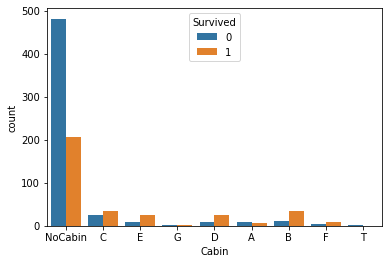

In [ ]:
sns.countplot(train_data['Cabin'],hue=train_data['Survived'])

## 轉成類別資料


In [ ]:
train_data['Sex']=train_data['Sex'].astype('category').cat.codes
train_data['Embarked']=train_data['Embarked'].astype('category').cat.codes
train_data['Pclass']=train_data['Pclass'].astype('category').cat.codes
train_data['title']=train_data['title'].astype('category').cat.codes
train_data['title2']=train_data['title2'].astype('category').cat.codes
train_data['Cabin']=train_data['Cabin'].astype('category').cat.codes


In [ ]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title,title2
0,0,2,Braund,1,22.0,1,0,7.2500,7,2,11,1
1,1,0,Cumings,0,38.0,1,0,71.2833,2,0,12,0
2,1,2,Heikkinen,0,26.0,0,0,7.9250,7,2,8,0
3,1,0,Futrelle,0,35.0,1,0,53.1000,2,2,12,0
4,0,2,Allen,1,35.0,0,0,8.0500,7,2,11,1
5,0,2,Moran,1,NaN,0,0,8.4583,7,1,11,1
6,0,0,McCarthy,1,54.0,0,0,51.8625,4,2,11,1
7,0,2,Palsson,1,2.0,3,1,21.0750,7,2,7,2
8,1,2,Johnson,0,27.0,0,2,11.1333,7,2,12,0
9,1,1,Nasser,0,14.0,1,0,30.0708,7,0,12,0


## 處理 Age 先補上NA(用平均值)再分群

In [ ]:
train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


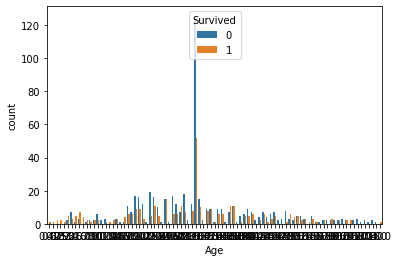

In [ ]:
sns.countplot(train_data['Age'],hue=train_data['Survived'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


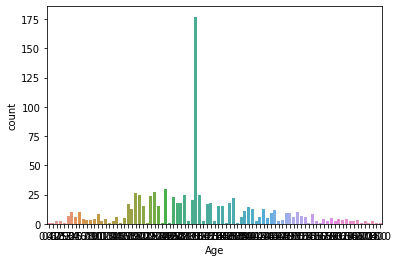

In [ ]:
sns.countplot(train_data['Age'])

In [ ]:
train_data['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
print(train_data['Age'])

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


In [ ]:
train_data['Age_gp']= train_data['Age'].apply(lambda x,  : 8 if int(x)>=70  else int(int(x)/10+1))
# max = lambda m, n: m if m > n else n

In [ ]:

train_data['Age_gp'].head(10)

0    3
1    4
2    3
3    4
4    4
5    3
6    6
7    1
8    3
9    2
Name: Age_gp, dtype: int64

In [ ]:
# 去除Name
train_data=train_data.drop(['Name'],axis=1)


In [ ]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title,title2,Age_gp
0,0,2,1,22.000000,1,0,7.2500,7,2,11,1,3
1,1,0,0,38.000000,1,0,71.2833,2,0,12,0,4
2,1,2,0,26.000000,0,0,7.9250,7,2,8,0,3
3,1,0,0,35.000000,1,0,53.1000,2,2,12,0,4
4,0,2,1,35.000000,0,0,8.0500,7,2,11,1,4
5,0,2,1,29.699118,0,0,8.4583,7,1,11,1,3
6,0,0,1,54.000000,0,0,51.8625,4,2,11,1,6
7,0,2,1,2.000000,3,1,21.0750,7,2,7,2,1
8,1,2,0,27.000000,0,2,11.1333,7,2,12,0,3
9,1,1,0,14.000000,1,0,30.0708,7,0,12,0,2


# 訓練模型


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',
               n_estimators=1000,
               min_samples_split=12,    
               oob_score=True,
               random_state=1,
               n_jobs=-1)

rf.fit(train_data.iloc[:,1:],train_data.iloc[:,0])
print("%4f" % rf.oob_score_)

0.829405


# 繳交預測的結果 Submission

In [ ]:
# 彙整上面的資料處理步驟

def DataClear(train_data):
  # 刪除 ID
  train_data=train_data.drop(['PassengerId'],axis=1)

  # 處理Name 欄位製作出兩個 title 欄位
  
  train_data['title']=train_data['Name'].str.split(',',expand=True)[1]
  train_data['Name']=train_data['Name'].str.split(',',expand=True)[0]
  train_data['title']=train_data['title'].str.split('.',expand=True)[0]
                                                    
  train_data['title2'] = (train_data['title']).replace(("Capt","Col","Don","Dr","Jonkheer","Major","Master","Rev","Sir"),"Rare",regex=True)
  train_data['title2'] = (train_data['title']).replace(("Capt","Col","Don","Dr","Jonkheer","Major","Master","Rev","Sir","Mme","Lady","the Countess"),"Rare",regex=True)
  train_data['title2'] = (train_data['title2']).replace(('Mlle','Ms','Mrs'),'Miss',regex=True)
  train_data['title2'] = (train_data['title2']).replace(('Mlle','Ms'),'Miss',regex=True)

  # 處理 Ticket
  train_data=train_data.drop(['Ticket'],axis=1)

  # 處理登船港口
  train_data['Embarked']=train_data['Embarked'].fillna('S')

  # 處理票價
  train_data['Fare']=train_data['Fare'].fillna(train_data['Fare'].mean())

  # 處理Cabin
  train_data['Cabin']= train_data['Cabin'].apply(lambda x :str(x)[0] if not pd.isnull(x) else 'NoCabin')

  # 刪除Name
  train_data=train_data.drop(['Name'],axis=1)

  # 轉成類別資料
  train_data['Sex']=train_data['Sex'].astype('category').cat.codes
  train_data['Embarked']=train_data['Embarked'].astype('category').cat.codes
  train_data['Pclass']=train_data['Pclass'].astype('category').cat.codes
  train_data['title']=train_data['title'].astype('category').cat.codes
  train_data['title2']=train_data['title2'].astype('category').cat.codes
  train_data['Cabin']=train_data['Cabin'].astype('category').cat.codes

  # 處理Age
  train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())
  train_data['Age_gp']= train_data['Age'].apply(lambda x,  : 8 if int(x)>=70  else int(int(x)/10+1))

  return(train_data)

In [ ]:
# 清理test 資料
test=DataClear(test_data)

In [ ]:
# 預測

rf_res=rf.predict(test)
submit['Survived']=rf_res
submit['Survived']=submit['Survived'].astype(int)
submit.to_csv('submit.csv',index=False)